In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\shubh\Downloads\USArrests.csv")
df.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
df.shape

(50, 5)

In [4]:
df.dtypes

States       object
Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

In [5]:
#checking the null values
df.isnull().sum()


States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [7]:
#splitting the data 
x=df.iloc[:,1:]
x.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [8]:
from sklearn.cluster import KMeans


wcss 
 [355807.8216, 96399.02814449917, 56422.89740852131, 40001.37802930403, 24504.9527032967, 19111.844634920635, 15570.937333333333, 14735.508031746032, 12363.919857142853, 12358.276904761906, 9901.304166666665]


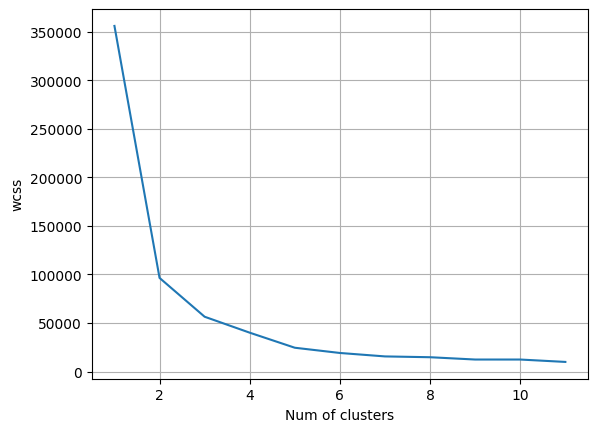

In [9]:
#finding the optimal value of K using Elbow method

wcss=[]

for i in range(1,12):
    model=KMeans(n_clusters=i)
    model.fit(x)
    wcss.append(model.inertia_)

print('wcss \n',wcss)

plt.plot(list(range(1,12)),wcss)
plt.xlabel('Num of clusters')
plt.ylabel('wcss')
plt.grid()
plt.show()

From above it can be seen that the optimal value of K is 3

In [10]:
#applying kmeans at k=3
k3=KMeans(n_clusters=3)  #k=3
k3.fit(x)

KMeans(n_clusters=3)

In [11]:
#generating the predication
ypred_k3=k3.predict(x)
ypred_k3

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 0, 1,
       2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0,
       2, 0, 0, 2, 2, 0])

In [13]:
#generating the cluster centroid
cent3=k3.cluster_centers_
print(cent3)

[[  6.32857143 139.71428571  67.95238095  19.16666667]
 [ 11.94736842 261.94736842  69.          28.63157895]
 [  2.95        62.7         53.9         11.51      ]]


In [14]:
df['Cluster_3'] = ypred_k3
df.head()

,States,Murder,Assault,UrbanPop,Rape,Cluster_3
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [16]:
df['Cluster_3'].value_counts()

Cluster_3
0    21
1    19
2    10
Name: count, dtype: int64

In [17]:
df[['Cluster_3','States']].sort_values(by='Cluster_3')

,Cluster_3,States
24,0,Missouri
46,0,Washington
45,0,Virginia
43,0,Utah
41,0,Tennessee
38,0,Rhode Island
37,0,Pennsylvania
36,0,Oregon
35,0,Oklahoma
34,0,Ohio
